<a href="https://colab.research.google.com/github/ehsanem/dl_boston/blob/main/00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split 
import pandas as pd
from matplotlib import pyplot as plt
print(tf.__version__)

2.8.0


In [ ]:
boston_original = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston_original.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
boston_dataset = pd.DataFrame(boston_original['data'])

In [ ]:
boston_dataset.columns = boston_original['feature_names']

In [ ]:
boston_dataset['PRICE'] = boston_original['target']

In [ ]:
y = boston_dataset['PRICE']
X= boston_dataset.iloc[:,0:13]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
X_train_tensor = tf.constant(X_train)
X_test_tensor = tf.constant(X_test)
y_train_tensor = tf.constant(y_train)
y_test_tensor = tf.constant(y_test)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='Adam', loss='mae', metrics='mae')

In [ ]:
model.fit(X_train_tensor, y_train_tensor, epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 62.9948 - mae: 62.9948
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 19.0799 - mae: 19.0799
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 12.9441 - mae: 12.9441
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 7.5886 - mae: 7.5886
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 6.9123 - mae: 6.9123
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 7.1595 - mae: 7.1595
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 6.2523 - mae: 6.2523
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 6.9515 - mae: 6.9515
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 6.4117 - mae: 6.4117
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 6.3134 - mae: 6.3134
Epoch 11/100
12/12 [==============================] -

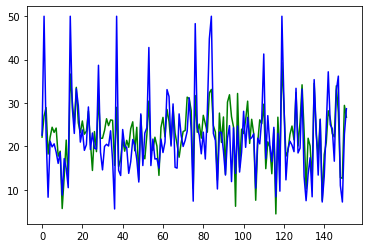

In [ ]:
plt.plot(model.predict(X_test_tensor), color='green')
plt.plot(y_test_tensor, color='blue')
plt.show()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               1400      
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________
